In [1]:
%matplotlib inline

from sympy import init_printing

init_printing()

# Symbolic Mathematics using SymPy（SymPyによる数式処理）

## Hayao Suzuki

- PyCon JP 2018 at Ota City Industrial Plaza
- September 18, 2018
- `#pyconjp` `#pyconjp_3`

# We will talk about

- What's SymPy?
- How to use SymPy
- Mathematics (Undergraduate Level)

# We will NOT talk about

- SymPy Internal (implementions, etc...)
- Algorithms of calculation
- Mathematics (High School Level)

# Are You Ready?

$$e^{x} = \sum^{\infty}_{k=0}\frac{x^{k}}{k!}$$

$$ \int^{\infty}_{-\infty} \frac{1}{\sqrt{2\pi \sigma^{2}}} \exp \left (-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right )dx = 1$$

# About Me （お前誰よ）

- Name: Hayao Suzuki（鈴木　駿） ([@CardinalXaro](https://twitter.com/CardinalXaro))
- Blog: https://xaro.hatenablog.jp/
- Major: Mathematics (Combinatorics, Number Theory)
- Degree: 修士（工学）、電気通信大学
- Work: Python Programmer at [iRidge, Inc.](https://iridge.jp/)

# Reviewed Books (Excerpted)

- Effective Python (O’Reilly Japan)
- アルゴリズム クイックリファレンス 第 2 版 (O’Reilly Japan)
- すらすらわかる Python （翔泳社）
- Head First Python 第 2 版 (O’Reilly Japan)
- Python データサイエンスハンドブック (O’Reilly Japan)
- Python によるデータ分析入門 第 2 版 (O’Reilly Japan)
- Pythonによるあたらしいデータ分析の教科書（翔泳社）**New**
- 問題解決のPythonプログラミング (O’Reilly Japan) **New**

# Introduction

# What’s SymPy?

- A Python library for symbolic mathematics.
- Open source software(BSD license), SymPy is free both as in speech and as in beer.
- Written in pure Python.
- Doesn't  invent their own language. Sympy uses Python.
- Dependency on mpmath library only.


## What’s mpmath?

- Real and complex floating point arithmetic with arbitrary precision.

# Symbolic vs Numeric

## Solve this equation:

$$x^2 -8 = 0.$$

### Symbolic

$$x = \pm 2\sqrt{2}.$$

### Numeric

$$x = \pm 2.82842712474619.$$

# Example: Geometric Series

$$ \sum^{\infty}_{k=1}\frac{1}{4^{k}}.$$

### By hand

Let $S_{n}$ be 

\begin{equation}S_{n} = \sum^{n}_{k=1}\frac{1}{4^{k}}.\end{equation}

Then,
\begin{align}
S_{n} - \frac{1}{4}S_{n} &= \sum^{n}_{k=1}\frac{1}{4^{k}} - \frac{1}{4}\sum^{n}_{k=1}\frac{1}{4^{k}} \\
  &= \frac{1}{4} - \frac{1}{4^{n+1}}.
\end{align}

Therefore,

\begin{align}
\lim_{n \to \infty}S_{n} &= \lim_{n \to \infty} \frac{4}{3} \left ( \frac{1}{4} - \frac{1}{4^{n+1}} \right ) \\
&=\frac{1}{3}.
\end{align}

### Pure Python

In [2]:
sum(1 / 4**k for k in range(1, 100))

### SymPy

In [3]:
from sympy import Symbol, oo, summation

k = Symbol('k', integer=True)
summation(1 / (4**k), (k, 1, oo))

# Open Source vs Proprietary

## Open Source Software
- Maxima (Lisp)
- SymPy (Python)
- SageMath (Including SymPy, Python 2 only)

## Proprietary Software
- Mathematica
- Maple
- Magma


## My History

I used Mathematica when I was undergraduate, but I lost my student license when I became a graduate student.

# How to Install and Use SymPy

## How to Install Sympy

- `$ pip install sympy` (from PyPI)
- `$ conda update sympy` (from Anaconda)
- See http://docs.sympy.org/latest/install.html for more detail


## How to Use Sympy 

- `import sympy` as library
- `$ isympy`
- Jupyter Notebook (I recommend)


## I don’t want to install SymPy, but want to use it...

- OK, let’s go to http://live.sympy.org/

# Basics

# Symbols

$$\sum^{\infty}_{k=0}\frac{x^{k}}{k!}$$

- `Symbol`
- `oo`
- `factorial`
- `summation`

In [4]:
from sympy import Symbol, factorial, oo, summation

x = Symbol("x")
k = Symbol("k", integer=True)

summation(x**k / factorial(k), (k, 0, oo))

# Mean of Normal Distribution

$$ \int^{\infty}_{-\infty} \frac{x}{\sqrt{2\pi \sigma^{2}}} \exp \left (-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right )dx = \mu$$

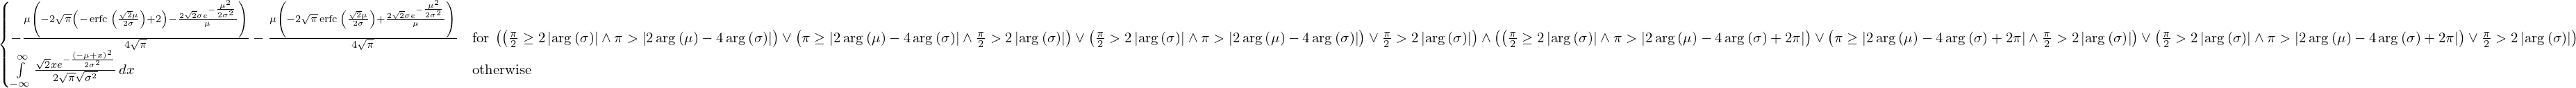

In [5]:
from sympy import Symbol, exp, integrate, oo, pi, sqrt

x = Symbol("x")
mu = Symbol("mu")
sigma = Symbol("sigma")
f = (x / sqrt(2 * pi * sigma**2)) *  exp(-((x - mu)**2) / (2 * sigma**2))
integrate(f, (x, -oo, oo))  # What's happen?

In [6]:
x = Symbol("x")
mu = Symbol("mu", real=True)  # mu should be Real 
sigma = Symbol("sigma", real=True, positive=True) # sigma should be Real and Positive value

f = (x / sqrt(2 * pi * sigma**2)) *  exp(-((x - mu)**2) / (2 * sigma**2))
integrate(f, (x, -oo, oo))  # OK, I expected.

# Expand and Factor

$$ (a + 2b + 3c)^{2} $$

- `expand`
- `factor`

In [7]:
from sympy import Symbol, symbols

a = Symbol("a")
b, c= symbols("b, c")

expr = (a + 2 * b + 3 * c) ** 2
expanded =  expr.expand()
expanded

In [8]:
expanded.factor()

# Factor with Extention

In [9]:
from sympy import Symbol, factor, I, sqrt

x = Symbol("x")
expr = x**2  + 2
factor(expr)

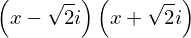

In [10]:
factor(expr, extension=[sqrt(2), I])

# Simplify

$$ \sin^{2}\theta + \cos^{2}\theta = 1$$

- `simplify`

In [11]:
from sympy import Symbol, cos, simplify, sin

theta = Symbol("theta")
sin(theta)**2 + cos(theta)**2

In [12]:
simplify(sin(theta)**2 + cos(theta)**2)

# Solvers

$$ax^{2} + bx + c = 0$$

- `Eq`
- `solveset`
- `symbols`

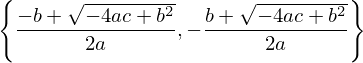

In [13]:
from sympy import Eq, Symbol, simplify, solveset, symbols

x, b, c = symbols("x, b, c")
a = Symbol("a", nonzero=True)
eq = Eq(a * x**2 + b * x + c, 0)
simplify(solveset(eq, x))

# Quintic Equation

$$ax^{5} + bx^{4} + cx^{3} + dx^{2} + ex + f = 0$$

- Abel–Ruffini Theorem: There is no algebraic solution to the general polynomial equations of degree five or higher with arbitrary coefficients.
- Symmetric group $\mathfrak{S}_{5}$ is non-solvable symmetric group.

In [14]:
from sympy import Eq, simplify, solveset, symbols

x, a, b, c, d, e, f = symbols("x, a, b, c, d, e, f")
eq = Eq(a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f, 0)
simplify(solveset(eq, x))

# Calculus

# Limits

$$\displaystyle \lim_{x \to 0} \frac{\sin{x}}{x}$$

- `limit`
- `pi`
- `plot`

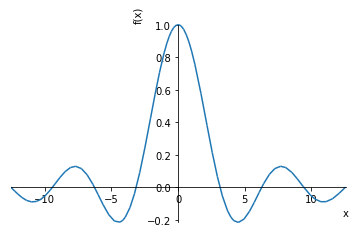

In [15]:
from sympy import Symbol, limit, pi, sin
from sympy.plotting import plot

x = Symbol("x")
f = (sin(x) / x)
plot(f, (x, -4 * pi, 4 * pi))

In [16]:
limit(f, x, 0, "+"), limit(f, x, 0, "-")

# Derivative

$$ \frac{d}{dx} e^{-x}\sin{x} $$

- `diff`

In [17]:
from sympy import Symbol, exp, sin

x = Symbol("x", real=True)
f = exp(-x) * sin(x)
f.diff()

# Partial Derivative

$$\frac{\partial^{7}}{\partial z^{4} \partial y^{2}\partial x} e^{x y z}$$

In [18]:
from sympy import Derivative, symbols, exp

x, y, z = symbols("x, y, z")
f = exp(x*y*z)
f.diff(x, y, y, z, z, z, z)

# Taylor Series

\begin{equation}
f(x) = \sum^{\infty}_{k=0}\frac{f^{(k)}(a)}{k!}(x-a)^{k}
\end{equation}

- `series`

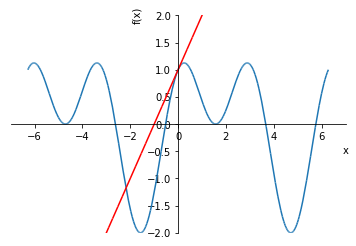

In [19]:
from sympy import Symbol, cos, pi, sin
from sympy.plotting import plot

x = Symbol("x")
f = sin(x) + cos(2 * x)

p = plot(f, f.series(n=10).removeO(), (x, -2*pi, 2*pi), xlim=(-7, 7), ylim=(-2, 2), show=False)
p[1].line_color = 'r'
p.show()

# Integral

$$ \int^{\infty}_{-\infty}\frac{\cos{x}}{x^{2} + 1}dx$$

- `integrate`

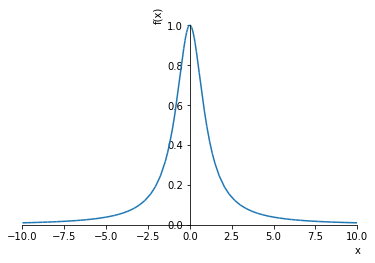

In [20]:
from sympy import Symbol, cos, integrate, oo, pi, simplify
from sympy.plotting import plot

x = Symbol("x")
f = cos(x) / (1 + x**2)
plot((1 / (1 + x**2)))

In [21]:
simplify(integrate(f, (x, -oo, oo)))

# Differential Equation of Simple Harmonic Motion

$$ \frac{d^{2}}{dt^{2}} x(t) = - \frac{k}{m}x(t)$$

- `Derivative`
- `Function`
-  `dsolve`

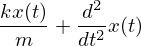

In [22]:
from sympy import Derivative, Function, Symbol, dsolve, symbols

t = Symbol("t")
k, m = symbols("k, m", positive=True)  # k and m should be positive constant
x = Function("x")(t)
expr = Derivative(x, t, 2) + (k / m) * x
expr

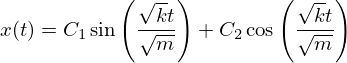

In [23]:
dsolve(expr)

# Linear Algebra

# Vandermonde's Determinant

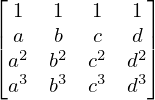

In [24]:
from sympy import Matrix, factor, symbols

a, b, c, d = symbols("a, b, c, d")
A = Matrix([
    [1, 1, 1, 1], 
    [a, b, c, d], 
    [a**2, b**2, c**2, d**2],
    [a**3, b**3, c**3, d**3],
])
A

In [25]:
factor(A.det())

# Null space and Column Space

\begin{equation}
V / \mathrm{Ker}(f_{A}) \cong \mathrm{Im}(f_{A}(V))
\end{equation}

In [26]:
from sympy import Matrix

A = Matrix([
    [1, 1, 2], 
    [2 ,1 , 3], 
    [3 , 1, 4]
])

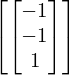

In [27]:
A.nullspace()

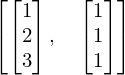

In [28]:
A.columnspace()

# Characteristic Polynomial and Eigen Values

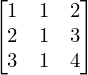

In [29]:
from sympy import Symbol, Matrix, factor, eye, zeros

lamda = Symbol('lamda')

A = Matrix([
    [1, 1, 2], 
    [2 ,1 , 3], 
    [3 , 1, 4]
])
A

In [30]:
p = A.charpoly(lamda)
factor(p)  # Characteristics Polynomial of A

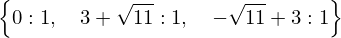

In [31]:
A.eigenvals()

# Number Theory

# Bertrand–Chebyshev Theorem

Let $\{p_{n}\} _{n\ge1}$ be a sequence of prime numbers, then $p_{n+1} < 2p_{n}$.

In 1845, Joseph Bertrand himself verified his statement for $2$ to $3 \times 10^{6}$. In 2018, We verified this statement for $2$ to $3 \times 10^{6}$ by Shift-Enter!

- `sieve`

In [32]:
from itertools import tee
from sympy import sieve

def pairwise(iterable):
    """s -> (s0,s1), (s1,s2), (s2, s3), ..."""
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)


all([p < q < 2 * p for p, q in pairwise(sieve.primerange(1, 3 * (10**6)))])

True

# Prime Number Theorem

\begin{equation}
\pi(x) \sim \frac{x}{\log{x}}
\end{equation}

- This theorem was proved independently by Jacques Hadamard and Charles Jean de la Vallée Poussin in 1896.

- `lambdify`

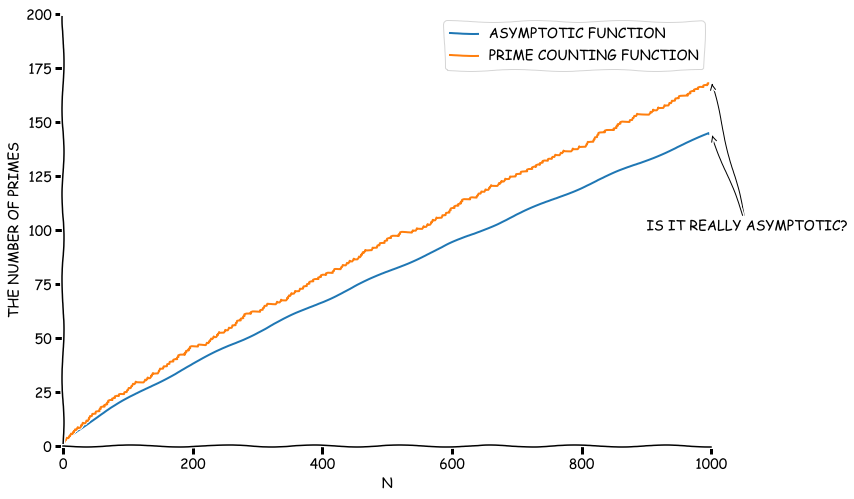

In [33]:
import matplotlib.pyplot as plt
from sympy import Symbol, log, lambdify, primepi

x = Symbol("x")
f = lambdify(x, x / log(x))

asymptotic = [f(n) for n in range(2, 1000)]
counting  = [primepi(n)  for n in range(2, 1000)]

with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0, 0, 1.5, 1.5))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim([0, 1000])
    ax.set_ylim([0, 200])
    
    plt.plot(asymptotic, label="asymptotic function".upper())
    plt.plot(counting, label="prime counting function".upper())
    plt.legend()
    plt.annotate('is it really asymptotic?'.upper(), xy=(1000, 169), arrowprops=dict(arrowstyle='->'), xytext=(900, 100))
    plt.annotate('is it really asymptotic?'.upper(), xy=(1000, 145), arrowprops=dict(arrowstyle='->'), xytext=(900, 100))

    plt.xlabel('N')
    plt.ylabel('the number of primes'.upper())

# Riemann Hypothesis

\begin{equation}
\zeta(s) = \sum^{\infty}_{n=1} \frac{1}{n^{s}}
\end{equation}

Conjecture: The real part of every non-trivial zero of the Riemann zeta function is $\frac{1}{2}$.

- `zeta`

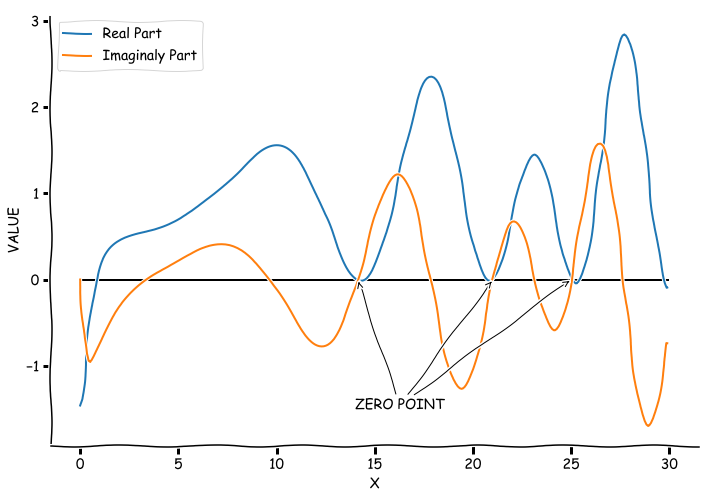

In [34]:
import numpy as np
from sympy import I, im, re, lambdify, zeta

z = zeta(1 / 2 + x * I)
real_part_of_zeta_func = lambdify(x, re(z), modules="sympy")
imaginaly_part_of_zeta_func = lambdify(x, im(z), modules="sympy")
xs = np.arange(0, 30, 0.1)
real_part = [real_part_of_zeta_func(x) for x in xs]
imaginaly_part = [imaginaly_part_of_zeta_func(x) for x in xs]

with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0, 0, 1.5, 1.5))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    plt.plot(xs, real_part, label='Real Part')
    plt.plot(xs, imaginaly_part, label='Imaginaly Part')
    plt.hlines([0], 0, 30)
    plt.legend()
    plt.annotate('ZERO POINT', xy=(14.135, 0), arrowprops=dict(arrowstyle='->'), xytext=(14, -1.5))
    plt.annotate('ZERO POINT', xy=(21.022, 0), arrowprops=dict(arrowstyle='->'), xytext=(14, -1.5))
    plt.annotate('ZERO POINT', xy=(25.011, 0), arrowprops=dict(arrowstyle='->'), xytext=(14, -1.5))


    plt.xlabel('X')
    plt.ylabel('VALUE')

# OK, When do I use SymPy?

## Case Study: My Master Thesis

### Lemma (Erdős)

For any $n \in \mathbb{N}$,
\begin{equation}
\prod_{p \le n} p < 4^{n},
\end{equation}
where a variable $p$ means a prime number.

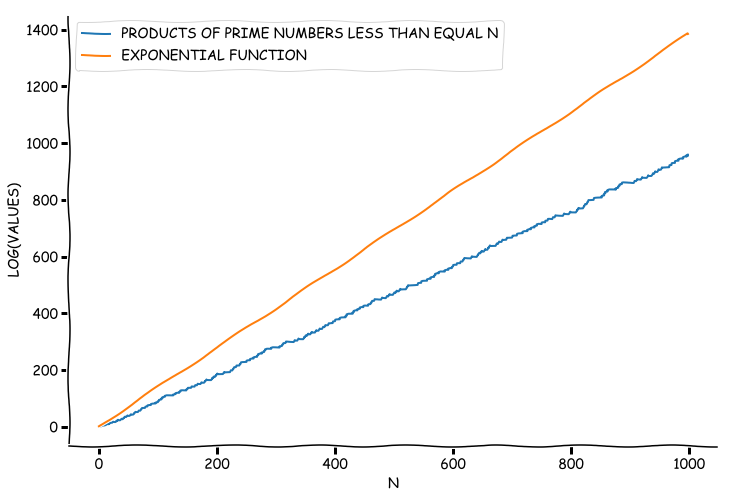

In [35]:
import functools
import itertools
import math
import operator

import matplotlib.pyplot as plt
from sympy import sieve

N = 1000

prods = [math.log(functools.reduce(operator.mul, sieve.primerange(1, n), 1)) for n in range(1, N)]  # log scale
exs = [2*n*math.log(2) for n in range(1, N)]  # log scale

with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0, 0, 1.5, 1.5))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')    
    plt.plot(prods, label="Products of Prime Numbers less than equal N".upper())
    plt.plot(exs, label="Exponential Function".upper())
    plt.legend()

    plt.xlabel('N')
    plt.ylabel('log(values)'.upper())

### Lemma (Chandrasekharan)

For any $n \in \mathbb{N}$, 

\begin{equation}
\frac{4^{n}}{2\sqrt{n}} \le \binom{2n}{n}.
\end{equation}

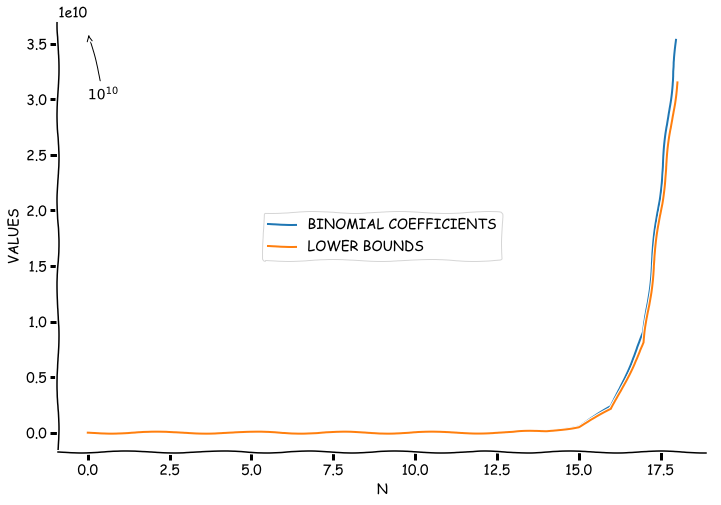

In [36]:
import math
from sympy import binomial

N = 20

binomials = [binomial(2*n, n) for n in range(1, N)] 
lowers = [(4**n) / (2 * math.sqrt(n)) for n in range(1, N)]

with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0, 0, 1.5, 1.5))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')    
    plt.plot(binomials, label="Binomial Coefficients".upper())
    plt.plot(lowers, label="Lower Bounds".upper())
    plt.legend(loc='center')
    plt.annotate(r'$10^{10}$', xy=(0, 3.6*10**10), arrowprops=dict(arrowstyle='->'), xytext=(0, 3*10**10))

    plt.xlabel('N')
    plt.ylabel('values'.upper())

# Summary

- SymPy is a Python library for symbolic mathematics.
- SymPy is free both as in speech and as in beer.
- SymPy uses Python. Most computer algebra systems invent their own language. Not SymPy.
- If you know Python and Mathematics, then you can use SymPy.
- Enjoy!